In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import random

from PIL import Image

import tensorflow as tf
from tensorflow.data import experimental
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D, experimental, Activation, AveragePooling2D, GlobalAveragePooling2D, Convolution2D
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
class_names = ["elliptical", "spiral", "uncertain"]
images = []
labels = []
    
for i in range(3):
    for filename in os.listdir("F:/images/" + class_names[i]):
        image = Image.open("F:/images/" + class_names[i] + "/" + filename)
        image = image.resize((64,64))
        image = np.array(image).astype('float32')
        images.append(image)
        labels.append(class_names[i])

In [3]:
zipped = list(zip(images, labels))
random.shuffle(zipped)
images, labels = zip(*zipped)

In [4]:
images = np.asarray(images)
print(images.shape)
print(images[0].ndim)
print(type(images))

(52122, 64, 64, 3)
3
<class 'numpy.ndarray'>


In [5]:
labels = np.asarray(labels)
print(labels.shape)
print(labels[0].ndim)
print(type(labels))

(52122,)
0
<class 'numpy.ndarray'>


In [6]:
new_labels = pd.get_dummies(labels)
new_labels = new_labels.to_numpy()
new_labels = np.asarray(new_labels)
print(new_labels.shape)
print(new_labels[0].ndim)
print(type(new_labels))
print(new_labels[0])

(52122, 3)
1
<class 'numpy.ndarray'>
[0 0 1]


In [7]:
x = images.astype('float32')
x = x / 255.0
x = x - 0.5
x = x * 2.0
x[0]

array([[[-0.8901961 , -0.9764706 , -0.96862745],
        [-0.92156863, -0.9843137 , -0.9764706 ],
        [-0.9372549 , -0.9764706 , -0.9843137 ],
        ...,
        [-0.92941177, -0.9529412 , -0.94509804],
        [-0.8745098 , -0.9607843 , -0.9529412 ],
        [-0.92941177, -0.9843137 , -0.99215686]],

       [[-0.90588236, -0.9843137 , -0.9764706 ],
        [-0.9372549 , -0.96862745, -0.9843137 ],
        [-0.94509804, -0.9843137 , -0.99215686],
        ...,
        [-0.9529412 , -0.9529412 , -0.92941177],
        [-0.9607843 , -0.96862745, -0.9529412 ],
        [-0.9529412 , -0.99215686, -0.96862745]],

       [[-0.84313726, -0.9764706 , -0.96862745],
        [-0.9372549 , -0.9843137 , -0.99215686],
        [-0.96862745, -0.9843137 , -0.99215686],
        ...,
        [-0.92156863, -0.90588236, -0.94509804],
        [-0.96862745, -0.9372549 , -0.96862745],
        [-0.9529412 , -0.9764706 , -0.9607843 ]],

       ...,

       [[-0.96862745, -0.96862745, -0.9843137 ],
        [-0

In [8]:
type(x)

numpy.ndarray

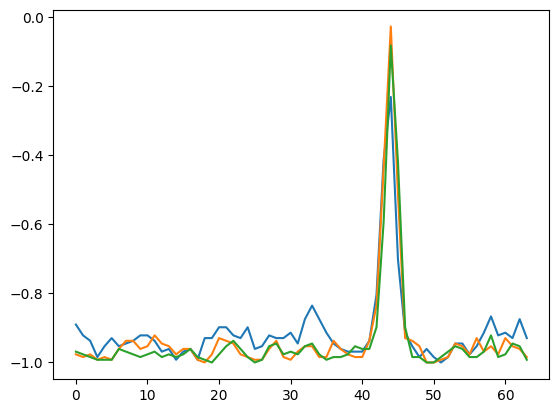

In [9]:
plt.plot(x[0,0])
plt.show()

In [10]:
num_samples, num_classes = new_labels.shape

num_samples = len(x)
num_train_samples = int((1-0.2)*num_samples)

x_train = x[:num_train_samples]
y_train = new_labels[:num_train_samples]

x_val = x[num_train_samples:]
y_val = new_labels[num_train_samples:]

train_data = (x_train, y_train)
val_data = (x_val, y_val)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(41697, 64, 64, 3)
(41697, 3)
(10425, 64, 64, 3)
(10425, 3)


In [12]:
model = Sequential([
    Convolution2D(filters=16, kernel_size=(7,7), padding="same", name='image_array', input_shape=(64,64,3)),
    BatchNormalization(),
    Convolution2D(filters=16, kernel_size=(7,7), padding="same"),
    BatchNormalization(),
    Activation('relu'),
    AveragePooling2D(pool_size=(2,2), padding='same'),
    Dropout(0.5),
    
    Convolution2D(filters=32, kernel_size=(5,5), padding="same"),
    BatchNormalization(),
    Convolution2D(filters=32, kernel_size=(5,5), padding="same"),
    BatchNormalization(),
    Activation('relu'),
    AveragePooling2D(pool_size=(2,2), padding='same'),
    Dropout(0.5),
    
    Convolution2D(filters=64, kernel_size=(3,3), padding="same"),
    BatchNormalization(),
    Convolution2D(filters=64, kernel_size=(3,3), padding="same"),
    BatchNormalization(),
    Activation('relu'),
    AveragePooling2D(pool_size=(2,2), padding='same'),
    Dropout(0.5),
    
    Convolution2D(filters=128, kernel_size=(3,3), padding="same"),
    BatchNormalization(),
    Convolution2D(filters=128, kernel_size=(3,3), padding="same"),
    BatchNormalization(),
    Activation('relu'),
    AveragePooling2D(pool_size=(2,2), padding='same'),
    Dropout(0.5),
    
    Convolution2D(filters=256, kernel_size=(3,3), padding='same'),
    BatchNormalization(),
    Convolution2D(filters=3, kernel_size=(3,3), padding='same'),
    GlobalAveragePooling2D(),
    Activation('softmax', name='Predictions')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_array (Conv2D)        (None, 64, 64, 16)        2368      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        12560     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 16)       64        
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 64, 64, 16)        0         
                                                                 
 average_pooling2d (AverageP  (None, 32, 32, 16)       0

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
data_generator = ImageDataGenerator(featurewise_center=False, featurewise_std_normalization=False, rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=.1, horizontal_flip=True)

In [17]:
train_images, train_labels = train_data
history = model.fit_generator(data_generator.flow(train_images, train_labels, 64), epochs=30, verbose=1, validation_data=val_data)

Epoch 1/30


C:\Temp\ipykernel_9932\885288975.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator.flow(train_images, train_labels, 64), epochs=30, verbose=1, validation_data=val_data)


652/652 [==============================] - 563s 863ms/step - loss: 0.8404 - accuracy: 0.6323 - val_loss: 0.8766 - val_accuracy: 0.6326
Epoch 2/30
652/652 [==============================] - 566s 869ms/step - loss: 0.8137 - accuracy: 0.6414 - val_loss: 0.8756 - val_accuracy: 0.6432
Epoch 3/30
652/652 [==============================] - 561s 860ms/step - loss: 0.7997 - accuracy: 0.6501 - val_loss: 0.7997 - val_accuracy: 0.6576
Epoch 4/30
652/652 [==============================] - 566s 868ms/step - loss: 0.7902 - accuracy: 0.6573 - val_loss: 0.8235 - val_accuracy: 0.6553
Epoch 5/30
652/652 [==============================] - 562s 862ms/step - loss: 0.7826 - accuracy: 0.6631 - val_loss: 0.8052 - val_accuracy: 0.6570
Epoch 6/30
652/652 [==============================] - 568s 870ms/step - loss: 0.7791 - accuracy: 0.6632 - val_loss: 0.7869 - val_accuracy: 0.6730
Epoch 7/30
652/652 [==============================] - 563s 864ms/step - loss: 0.7758 - accuracy: 0.6657 - val_loss: 0.7739 - val_accura

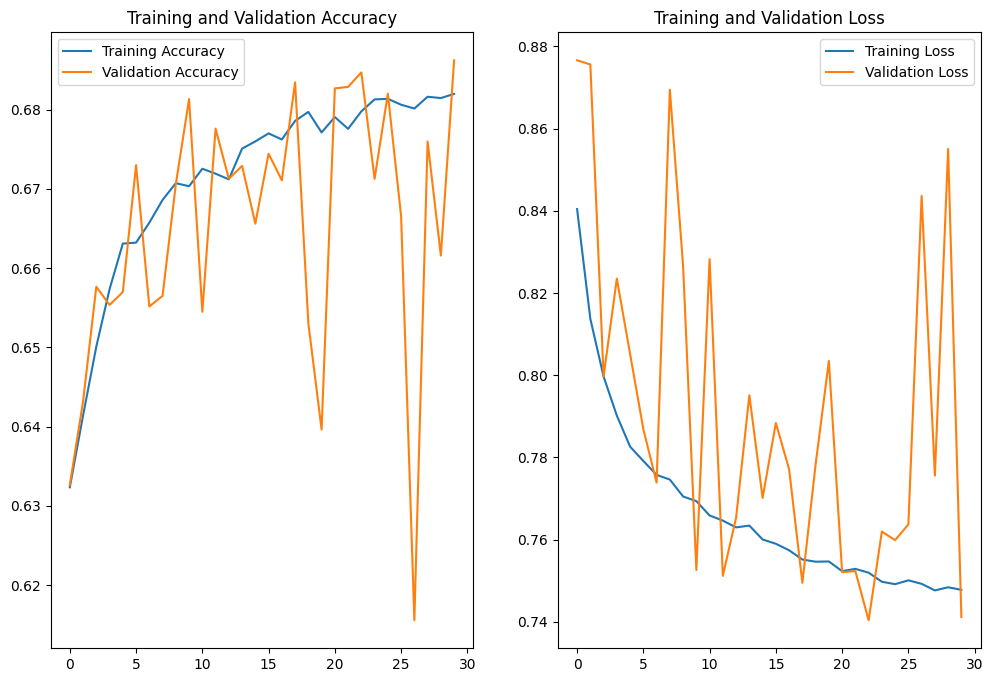

In [18]:
# assess model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [26]:
image_path = "C:/Users/user/python_machine_learning/2023_창의학술제/uncertain_sample_image.jpg"

# 이미지 로드 및 전처리
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(f"This image most likely belongs to {class_names[np.argmax(score)]} with {np.max(score)} confidence")

1/1 [==============================] - 0s 28ms/step
This image most likely belongs to elliptical with 0.5761135816574097 confidence
